In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import sys
sys.path.append('../src')

In [5]:
from d00_utils.db_utils import dbReadWriteClean, dbReadWriteViews
io_clean = dbReadWriteClean()
io_views = dbReadWriteViews()

/home/ubuntu/anaconda3/envs/usal_echo/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [6]:
measurement_abstract_rpt_df = io_clean.get_table("measurement_abstract_rpt")
print(measurement_abstract_rpt_df.shape)
measurement_abstract_rpt_df.head()

(1568351, 5)


,studyidk,measabstractnumber,name,value,unitname
0,2882,2,(P1/2t)AVM,2.491754,cm2
1,2882,12,Area TSVI,3.606348,cm2
2,2882,43,FE(el-ps4),37.032087,%
3,2882,46,FE(MDD-ps4),35.095355,%
4,2882,125,P1/2t VM,88.291224,ms


In [7]:
instances_w_labels_test_df = io_views.get_table('instances_w_labels_test')
instances_w_labels_test_df = instances_w_labels_test_df[(instances_w_labels_test_df['view']=='a2c') | (instances_w_labels_test_df['view']=='a4c')]
print(instances_w_labels_test_df.shape)
instances_w_labels_test_df.head()

(2726, 5)


,sopinstanceuid,filename,instanceidk,view,studyidk
0,1.2.840.113663.1500.1.365900332.3.4.20120704.1...,8ZGVCN6C,696438,a4c,39553
1,1.2.840.113663.1500.1.365900332.3.16.20120704....,8ZGVCPFW,696467,a2c,39553
2,1.2.840.113663.1500.1.365900332.3.9.20120704.1...,8ZGVDB47,696500,a4c,39555
4,1.2.840.113663.1500.1.365900332.3.13.20121022....,D1K0E7SN,738302,a2c,41686
6,1.2.840.113663.1500.1.365900332.3.9.20121106.1...,E457WH6C,744752,a4c,42015


In [8]:
instances_w_labels_test_downsampleby5_df = io_views.get_table('instances_w_labels_test_downsampleby5')
instances_w_labels_test_downsampleby5_df = instances_w_labels_test_downsampleby5_df[(instances_w_labels_test_downsampleby5_df['view']=='a2c') | (instances_w_labels_test_downsampleby5_df['view']=='a4c')]
print(instances_w_labels_test_downsampleby5_df.shape)
instances_w_labels_test_downsampleby5_df.head()

(522, 5)


,sopinstanceuid,filename,instanceidk,view,studyidk
0,1.2.840.113663.1500.1.365900332.3.8.20130125.1...,1LHFYKEZ,779540,a4c,43763
2,1.2.840.113663.1500.1.365900332.3.11.20130611....,7SQZPLEJ,841585,a4c,46919
4,1.2.840.113663.1500.1.365900332.3.8.20131120.1...,EAKXA40T,921901,a4c,50521
15,1.2.840.113663.1500.1.365900332.3.19.20140818....,AFUJWQM9,1078635,a4c,57515
17,1.2.840.113663.1500.1.365900332.3.19.20140828....,AKFY2K0G,1084663,a2c,57770


In [9]:
a_measgraphref_df = io_clean.get_table("a_measgraphref")
print(a_measgraphref_df.shape)
a_measgraphref_df.head()

/home/ubuntu/anaconda3/envs/usal_echo/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3006: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


(858255, 10)


,studyidk,measabstractnumber,meassequence,instanceidk,indexinmglist,value,howentered,srinstanceidk,imagesopinstanceuid,measurementuid
0,2882,187,0,57164,0,28.242271,0,,,
1,2882,188,0,57164,0,7.897812,0,,,
2,2882,189,0,57164,0,85.725750,0,,,
3,2882,190,0,57164,0,87.190031,0,,,
4,2882,191,0,57164,1,36.654466,0,,,


In [10]:
def get_recommendation(row):
    return 'normal' if row['value'] >= 60 else 'abnormal' if row['value'] < 40 else 'greyzone'

In [11]:
start_df = measurement_abstract_rpt_df
filter_df = start_df

In [12]:
filter_df = filter_df[filter_df['name'].str.contains('FE')]
filter_df = filter_df[filter_df['value']>=0]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

1568351
85719
0.05465549484777323


In [13]:
filter_df['name'].value_counts()

FE(MDD-ps4)             17222
FE(el-ps4)              16332
FE(Teich)               11741
FE(cúbico)              11736
FE(MDD-ps2)              9476
FE(el-ps2)               9107
FE(MDD-bp)               8938
FE (Bi-Plane) (aCMQ)      591
FE A4C (aCMQ)             262
FE (HM)_phl               250
FEVI Bipl                  49
FE(MDD-bp)esf              12
FE_3D-Vol.                  3
Name: name, dtype: int64

In [14]:
filter_df = filter_df[filter_df['name'].str.contains('ps4')]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

1568351
33554
0.02139444550358944


In [15]:
filter_df['name'].value_counts()

FE(MDD-ps4)    17222
FE(el-ps4)     16332
Name: name, dtype: int64

In [16]:
filter_df = filter_df[filter_df['name'].str.contains('MDD')]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

1568351
17222
0.01098096025698329


In [17]:
filter_df.head()

,studyidk,measabstractnumber,name,value,unitname
3,2882,46,FE(MDD-ps4),35.095355,%
49,2966,46,FE(MDD-ps4),47.570583,%
155,5898,54,FE(MDD-ps4),30.191358,%
216,6085,46,FE(MDD-ps4),43.677717,%
260,6086,46,FE(MDD-ps4),56.657825,%


In [18]:
filter_df['value'].describe()

count    17222.000000
mean        59.425990
std         12.316584
min          3.069337
25%         53.584282
50%         60.688535
75%         67.546831
max         94.035998
Name: value, dtype: float64

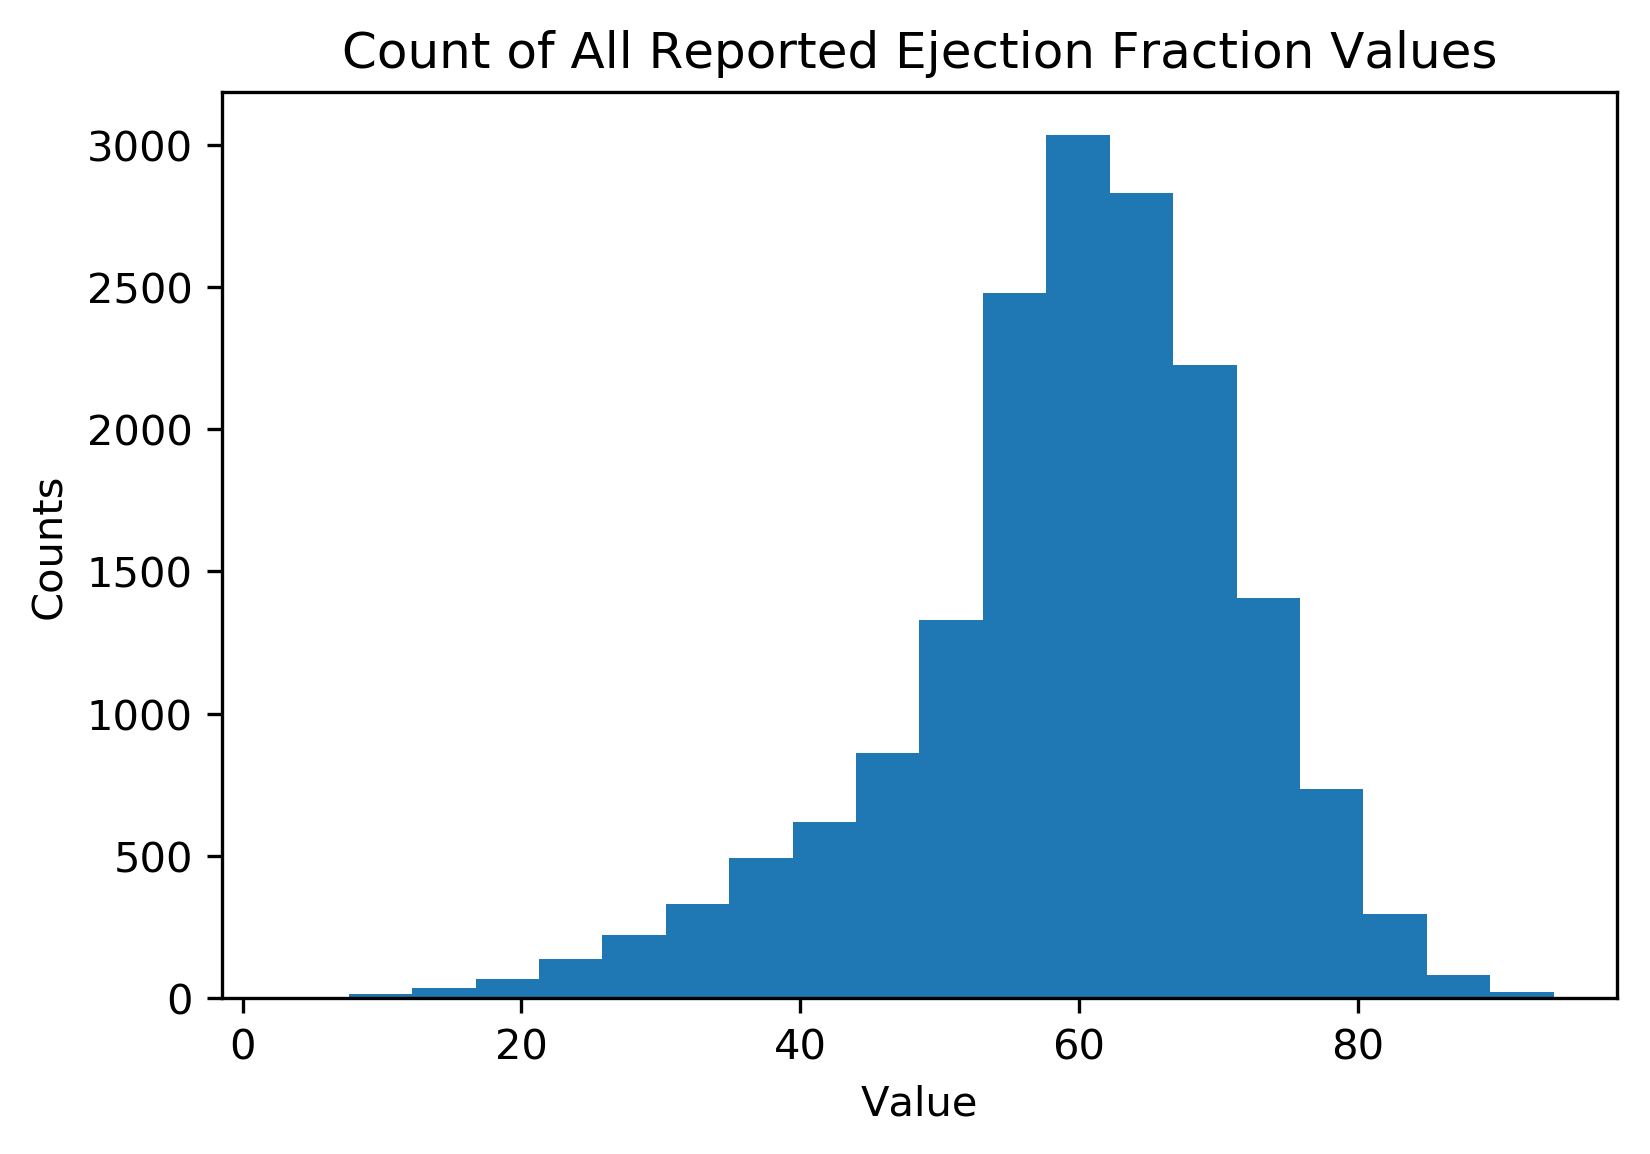

In [19]:
plt.title(f'Count of All Reported Ejection Fraction Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(filter_df['value'], bins=20);

In [20]:
filter_df['recommendation'] = filter_df.apply(get_recommendation, axis=1)

In [21]:
filter_df['recommendation'].value_counts()

normal      9092
greyzone    6751
abnormal    1379
Name: recommendation, dtype: int64

In [22]:
filter_df['recommendation'].value_counts()/filter_df['recommendation'].value_counts().sum()

normal      0.527929
greyzone    0.391999
abnormal    0.080072
Name: recommendation, dtype: float64

In [23]:
# filter_df = filter_df[filter_df['studyidk'].isin(instances_w_labels_test_df['studyidk'].unique())]
# print(len(start_df))
# print(len(filter_df))
# print(len(filter_df)/len(start_df))

In [24]:
filter_df = filter_df[filter_df['studyidk'].isin(instances_w_labels_test_downsampleby5_df['studyidk'].unique())]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

1568351
483
0.000307966775294561


In [25]:
filter_df = filter_df[filter_df['studyidk'].isin(a_measgraphref_df['studyidk'].unique())]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

1568351
483
0.000307966775294561


In [26]:
filter_df['value'].describe()

count    483.000000
mean      59.907743
std       12.513787
min       15.058492
25%       53.488129
50%       61.070232
75%       68.610079
max       92.501219
Name: value, dtype: float64

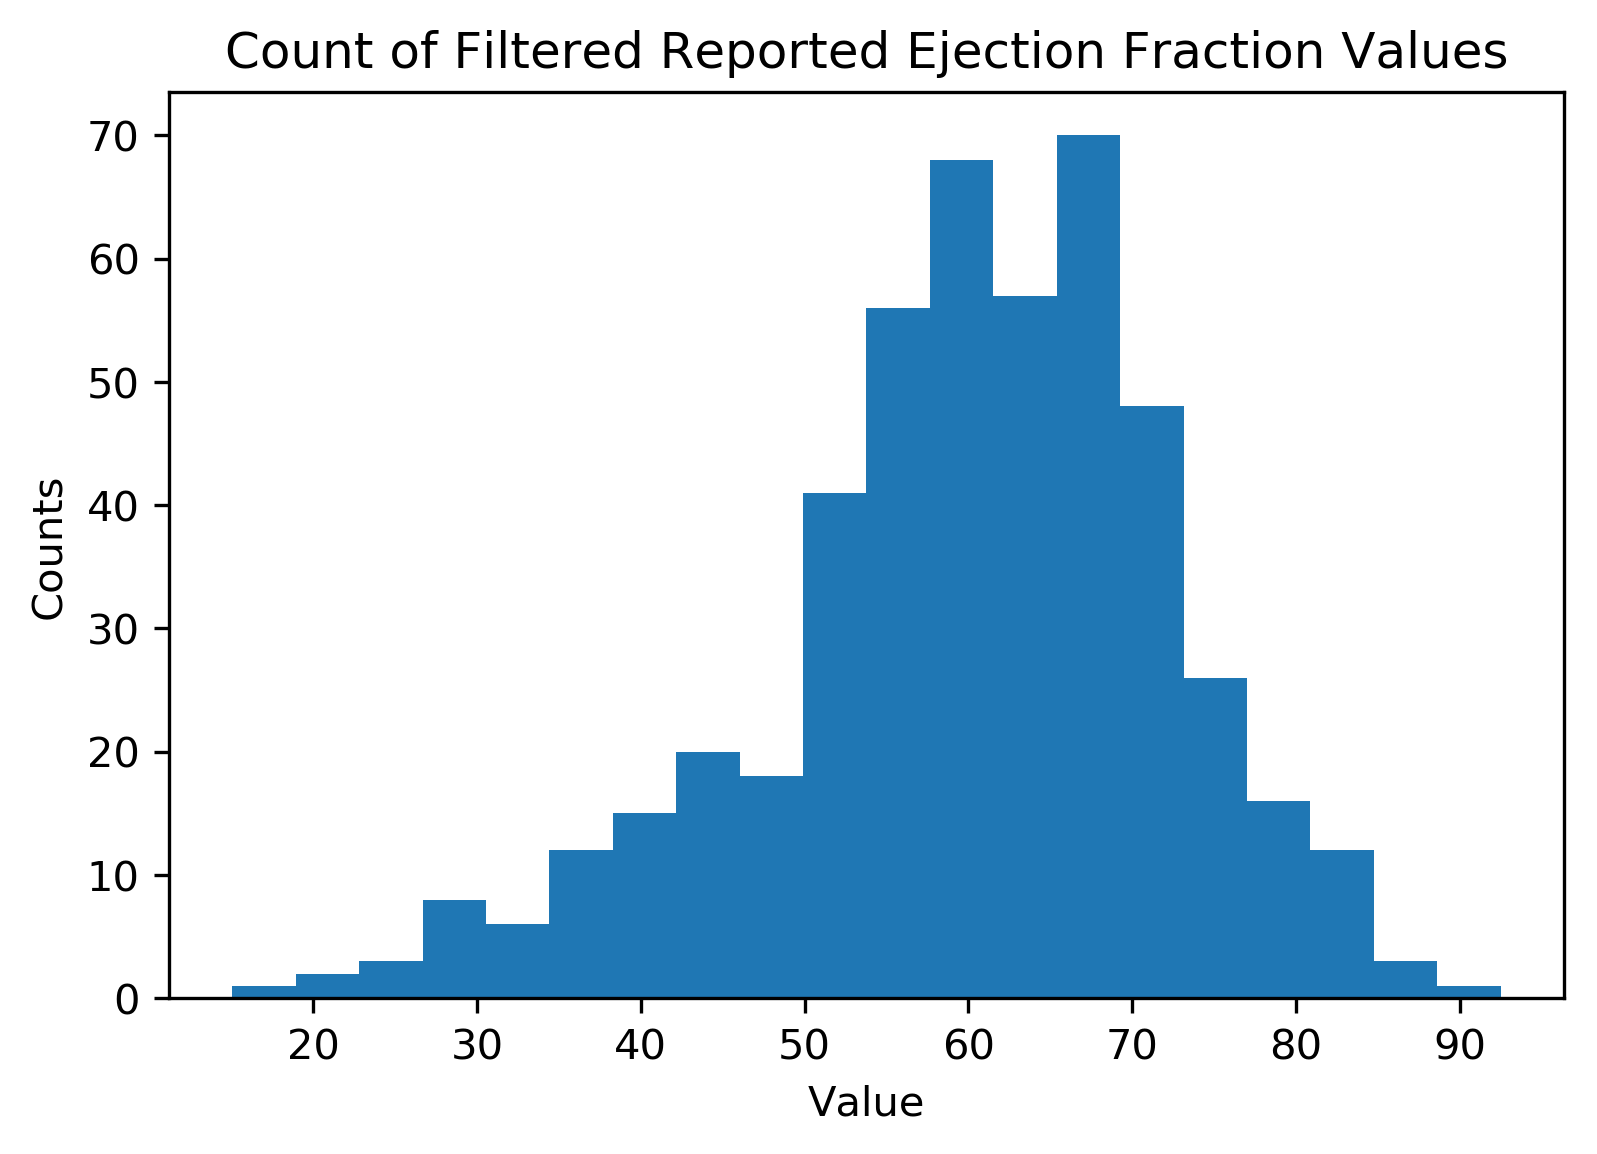

In [27]:
plt.title(f'Count of Filtered Reported Ejection Fraction Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(filter_df['value'], bins=20);

In [28]:
filter_df['recommendation'].value_counts()

normal      260
greyzone    186
abnormal     37
Name: recommendation, dtype: int64

In [29]:
filter_df['recommendation'].value_counts()/filter_df['recommendation'].value_counts().sum()

normal      0.538302
greyzone    0.385093
abnormal    0.076605
Name: recommendation, dtype: float64

In [30]:
filter_df.head()

,studyidk,measabstractnumber,name,value,unitname,recommendation
57522,43763,96,FE(MDD-ps4),60.853560,%,normal
73661,46919,96,FE(MDD-ps4),51.193124,%,greyzone
93954,50521,96,FE(MDD-ps4),55.680283,%,greyzone
152959,57515,98,FE(MDD-ps4),57.314276,%,greyzone
157784,57770,108,FE(MDD-ps4),52.836621,%,greyzone
